# 5.3. Fórmula de Newton



Seja $f(x)$ definida em $x_0, x_1,...,x_n$, (n+1) pontos distintos de um intervalo $[a,b]$ e $y_i=f(x_i)$, $i=0,1,...,n$. O polinômio interpolador de Newton é dado por 

$$ P(x) = f[x_0] + (x-x_0)f[x_0,x_1] + (x-x_0)(x-x_1)f[x_0,x_1,x_2]+...+(x-x_0)(x-x_1)...(x-x_{n-1})f[x_0,...,x_n]$$

onde $f[x_0]$, $f[x_0,x_1]$,...,$f[x_0,...,x_n]$ são as **diferenças divididas**, obtidas como é mostrado a seguir.


**Diferença dividida de ordem 0:**
$$f[x_i]=f(x_i), i=0,1,...,n$$

**Diferença dividida de ordem 1:**
$$f[x_i, x_{i+1}]=\frac{f[x_{i+1}]-f[x_{i}]}{x_{i+1}-x_i}, i=0,1,...,n-1$$

**Diferença dividida de ordem 2:**
$$f[x_i, x_{i+1}, x_{i+2}]=\frac{f[x_{i+1}, x_{i+2}] - f[x_{i}, x_{i+1}]}   {x_{i+2} - x_i}, i=0,1,...,n-3$$

$\vdots$

**Diferença dividida de ordem n:**
$$f[x_0,...,x_n]=\frac{f[x_1,...,x_n] - f[x_0, ...,x_{n-1}]}   {x_n - x_0} $$

Para obter as diferenças divididas da fórmula de Newton, é conveniente condtruir uma tabela, como mostrada abaixo

<img src="https://github.com/tiagoburiol/NUMETHODS/raw/master/5_INTERPOLACAO/imagens/tabela_diferecas_divididas.png" width="400">





**Exemplo 1**

Considere a função $f(x)=e^x +sen(x)$ tabelada  nos pontos $x_0=0.0$, $x_1=0.5$ e $x_2=1.0$. Determine o polinômio interpolador usando a fórmula de Newton e avalie $f(0.7)$. 


[ 0.   0.5  1. ]
[ 1.      2.1281  3.5598]
[ 2.2563  2.8632]
[ 0.6069]
P(0.7) = 2.66437410753


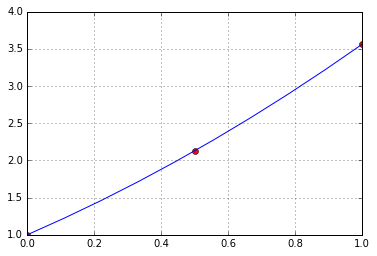

In [31]:
% matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


# Definindo a lista de pontos a serem interpolados
X  = [0., 0.5, 1.0]

# Definindo a função a ser interpolada
f = lambda x: np.exp(x)+np.sin(x)

# Calculando os valores de f(xi)
Y = f(X)

print (np.around(X,4))
print (np.around(Y,4))


# Criando uma lista de listas para a tabela de diferencas divididas 
dd=[Y] #ordem 0

# Gerando a tabela de dif. div. a partir da ordem 1 em diante
for o in range(1, len(X)):
    dd.append([])   # Adiciona uma lista vazia para armazenar as dds de ordem 1
    for k in range(0, len(X)-o, 1): 
        valor = (dd[o-1][k+1]-dd[o-1][k])/(X[k+o]-X[k])    
 
        dd[o].append(valor)
    print (np.around(dd[o],4))


def produtorio(x,n):
    prod = 1.
    for i in range(n):
        prod = prod * (x-X[i])
    return prod


def calculaP(x):
    soma = dd[0][0]
    for i in range(1,len(X)):
        soma = soma + produtorio(x,i)*dd[i][0]
    return soma

print ("P(0.7) =", calculaP(0.7))
 
# Cria a lista de pontos e calcula os valores para p plot
Xp = np.linspace(X[0], X[-1], num=10) 
Yp = []
for x in Xp:
    y = calculaP(x)
    Yp.append(y)

    
plt.plot(X, Y, 'ro', Xp, Yp,'-', )
plt.grid()
plt.show()

Embora o método de Lagrange possa parecer mais simples, a sua implementação computacional não é tão eficiente quanto a do método de Newton. Considere, por exemplo, um conjunto de quatro pontos $(n = 3)$ a serem interpolados. Então, o polinômio de Newton pode ser escrito como

$$ P(x) = f[x_0] + (x-x_0) ( f[x_0,x_1] + (x-x_1) (f[x_0,x_1,x_2] + (x-x_2) f[x_0,x_1,x_2, x_3] ) ) $$

o que fornece uma relação recursiva para a avaliação do polinômio, fazendo

$ P_0(x) = f[x_0,x_1,x_2, x_3] $ 

$ P_1(x) = f[x_0,x_1,x_2] + (x-x_2) P_0(x) $

$ P_2(x) = f[x_0,x_1] + ((x-x_1)) P_1(x) $

$ P_3(x) = f[x_0] + (x-x_0) P_2(x)$

**Exemplo 2**

Considere a função $f(x)=\frac{x}{(x+1)}$ tabelada  nos pontos $x_0=0.0$, $x_1=1.0$ e $x_2=2.0$. Determine o polinômio interpolador usando a fórmula de Newton e avalie $f(1.3)$. 


P(1.3) = 0.585


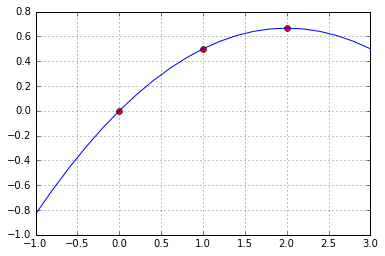

In [51]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xData = np.array([0., 1.0, 2.0])
f = lambda xData: np.divide(xData, xData + 1)
yData = f(xData)


def calculaP(dd,xData,x):
    n = len(xData) - 1
    # Degree of polynomial
    p = dd[n]
    for k in range(1,n+1):
        p = dd[n-k] + (x -xData[n-k])*p
    return p

def difdiv(xData,yData):
    m = len(xData)
    dd = yData.copy()

    for k in range(1,m):
        dd[k:m] = (dd[k:m] - dd[k-1])/(xData[k:m] - xData[k-1])
    return dd


dd = difdiv(xData,yData)

print ("P(1.3) =", calculaP(dd,xData,1.3))

Xplot = np.linspace(-1, 3, 21)
Yplot = []

for x in Xplot:
    Yplot.append(calculaP(dd,xData,x))

plt.plot(xData, yData, "ro", Xplot, Yplot, "-")
plt.grid()
plt.show()

### Interpolação Inversa

Denominamos interpolação inversa quando, conhecidos os valores de uma função $f(x)$ definida em $(n+1)$  pontos distintos $x_i$ ,$i =0,...,n$, necessitamos calcular o valor numérico da variável $x$ correspondente a um valor $y = f(x)$ conhecido inicialmente.

Supondo que a função inversa de $f (x)$ exista no intervalo de interpolação, a qual denotamos por $f^{-1}(x)$, então para os pontos tabelados $y_i = f(x_i)$, $i = 0,...,n$ temos $x_i =f^{-1}(y_i)$, e o valor desejado $x$ tal que $y=f(x)$ é obtido por $x=f^{-1}(y)$.

Assim, simplesmente trocamos na tabela de dados os valores de $x$ e $f(x)$ e fazemos a interpolação de $f^{−1}(x)$, como visto anteriormente.

Lembramos, ainda, que a função inversa $x = f^{−1}(y)$ existe e é única se $f(x)$ é contínua e monótona crescente ou decrescente no intervalo de interpolação. 


**Exemplo 3**

Considere uma função $f (x)$ tabelada, como segue:

$$\begin{array}{cccc}
x_i    &0     &1     &2\\ 
f(x_i) &1.31  &3.51  &3.78 
\end{array} $$

Usando	interpolação	inversa, determine $x$ tal que $f(x) = 3.63$.


P(3.63)= 1.4207663681347895


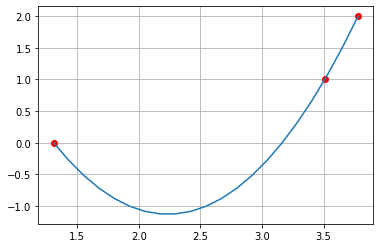

In [4]:
import numpy as np
import matplotlib.pyplot as plt

yi = np.array([0.00, 1.00, 2.00])
xi = np.array([1.31, 3.51, 3.78])


def evalPoly(dd,xi,x):
    n = len(xi) - 1
    # Degree of polynomial
    p = dd[n]
    for k in range(1,n+1):
        p = dd[n-k] + (x -xi[n-k])*p
    return p

def coeffts(xi,yi):
    m = len(xi)
    # Number of data points
    dd = yi.copy()

    for k in range(1,m):
        dd[k:m] = (dd[k:m] - dd[k-1])/(xi[k:m] - xi[k-1])
    return dd


dd = coeffts(xi,yi)

print("P(3.63)=",evalPoly(dd,xi,3.63))

Xplot = np.linspace(xi[0], xi[-1], 21)
Yplot = []

for x in Xplot:
    Yplot.append(evalPoly(dd,xi,x))

plt.plot(xi, yi, "ro", Xplot, Yplot, "-")
plt.grid()
plt.show()